In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
metadata_df = pd.read_csv('/nfs/leia/research/stegle/dseaton/data/retreat_hackathon2019/CompetitionRetreat/Annotation/relevantCellAnnotation.txt',
                         sep='\t')
metadata_df['index'] = metadata_df['Tissue'] + '_' + metadata_df['Original_Well_ID']
metadata_df = metadata_df.set_index('index', drop=False)
metadata_df.head()

,RNA_Cell_ID,RNA_sample_accession,Meth_Cell_ID,Meth_sample_accession,Original_Well_ID,Tissue,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,index
index,,,,,,,,,,,,,,
D3_E01,20287_8#5,SAMEA4361746,20322_5#5,SAMEA4361938,E01,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D3_E01
D3_A12,20287_8#89,SAMEA4361830,20322_8#17,SAMEA4362022,A12,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D3_A12
D3_F06,20287_8#46,SAMEA4361787,20322_6#22,SAMEA4361979,F06,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D3_F06
D3_D08,20287_8#60,SAMEA4361801,20322_7#12,SAMEA4361993,D08,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D3_D08
D3_G06,20287_8#47,SAMEA4361788,20322_6#23,SAMEA4361980,G06,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D3_G06


In [27]:
df1 = pd.read_csv('/nfs/leia/research/stegle/dseaton/data/retreat_hackathon2019/CompetitionRetreat/ExpressionMatrix/exprs_UD.txt',
                  sep='\t', index_col=0)
df2 = pd.read_csv('/nfs/leia/research/stegle/dseaton/data/retreat_hackathon2019/CompetitionRetreat/ExpressionMatrix/exprs_D3_test.txt',
                  sep='\t', index_col=0)
e_df = pd.concat([df1,df2], axis=1)
e_df.columns = metadata_df.set_index('RNA_Cell_ID').loc[e_df.columns,'index'].tolist()
e_df.head()

,UD_B02,UD_C02,UD_D02,UD_E02,UD_F02,UD_G02,UD_H02,UD_A03,UD_B03,UD_C03,...,D3_B09,D3_E09,D3_F09,D3_C10,D3_F10,D3_A11,D3_F11,D3_A12,D3_D12,D3_G12
ENSG00000215796_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000213262_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000226984_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000134249_ADAM30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000237622_TCEB1P18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
pca_df = pd.read_csv('/nfs/software/stegle/users/dseaton/dev/pufferfish/data/methylation_PCA.tsv', sep='\t', index_col=0)

pca_df.head()

,D3_A03,D3_B01,D3_B02,D3_C02,D3_D02,D3_E01,D3_E03,D3_F01,D3_G01,D3_G03,...,UD_E11,UD_E12,UD_F10,UD_F11,UD_F12,UD_G10,UD_G11,UD_G12,UD_H10,UD_H11
PC1,0.065160,0.058485,0.064928,0.053144,0.036813,0.060230,0.067768,0.041697,0.049167,0.053284,...,0.115035,0.110031,0.112416,0.113675,0.090076,0.090077,0.096105,0.085483,0.075167,0.118619
PC2,0.125893,0.136042,0.125066,0.132817,0.099023,0.137622,0.137299,0.112298,0.120284,0.137358,...,-0.036987,-0.037057,-0.039929,-0.030078,-0.055203,-0.061814,-0.051042,-0.060012,-0.064541,-0.033952
PC3,0.000349,0.004351,0.027651,-0.031270,-0.079782,-0.022605,0.006424,-0.043215,-0.015138,-0.033835,...,0.055920,0.079719,0.037413,0.135258,-0.115475,-0.107153,-0.060735,-0.162523,-0.174646,0.089225
PC4,0.181711,0.061136,0.137637,-0.033584,-0.241343,0.078729,0.190856,-0.194979,-0.008433,-0.012988,...,0.006308,0.011456,-0.034737,-0.042735,0.032825,0.056084,0.034725,0.035875,-0.007329,-0.032388
PC5,0.011285,0.070608,0.059454,0.024315,0.001837,-0.058979,-0.006237,0.040260,0.114202,-0.054547,...,0.029694,0.023459,0.043068,-0.108871,0.127234,0.028981,0.095591,-0.099610,-0.245380,0.008781


In [7]:
df = metadata_df.join(pca_df.transpose(), how='inner')
print(df.shape)
df.head()

(137, 18)


,RNA_Cell_ID,RNA_sample_accession,Meth_Cell_ID,Meth_sample_accession,Original_Well_ID,Tissue,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,PC1,PC2,PC3,PC4,PC5
D3_A03,20287_8#17,SAMEA4361758,20322_5#17,SAMEA4361950,A03,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065160,0.125893,0.000349,0.181711,0.011285
D3_A06,20287_8#41,SAMEA4361782,20322_6#17,SAMEA4361974,A06,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053352,0.127479,-0.035660,0.028446,0.002566
D3_A07,20287_8#49,SAMEA4361790,20322_7#1,SAMEA4361982,A07,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061166,0.130333,0.027902,0.178327,0.015237
D3_A09,20287_8#65,SAMEA4361806,20322_7#17,SAMEA4361998,A09,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057559,0.126137,-0.030719,-0.085882,-0.095275
D3_A10,20287_8#73,SAMEA4361814,20322_8#1,SAMEA4362006,A10,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048145,0.126590,-0.035895,-0.108834,-0.038860


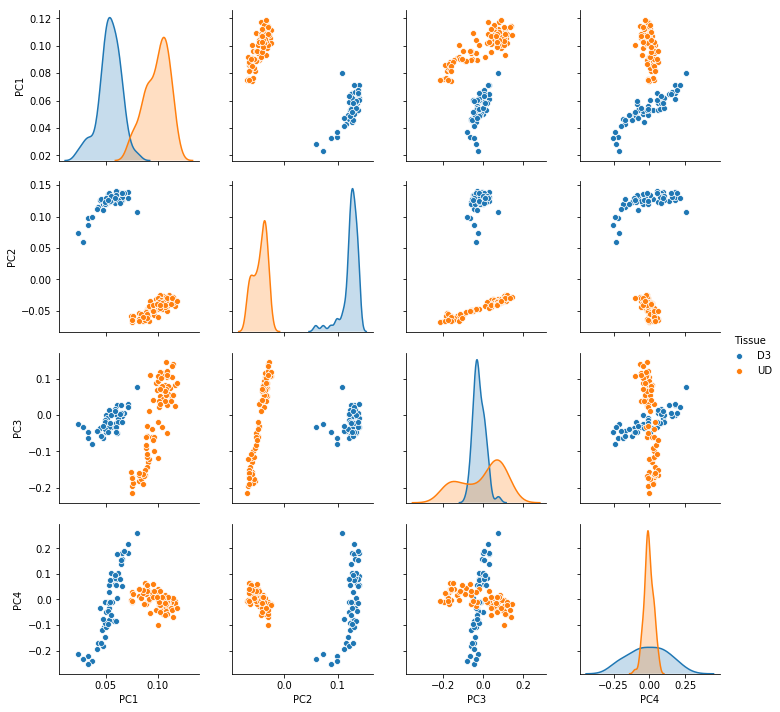

In [9]:
sns.pairplot(data=df, hue='Tissue', vars=['PC1','PC2','PC3','PC4'])

In [35]:
train_samples = list(set(e_df.columns) & set(pca_df.columns))
test_samples = list(set(pca_df.columns) - set(e_df.columns))

X = pca_df[train_samples].values.T
y = e_df[train_samples].values.T

print(X.shape)
print(y.shape)

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X, y)

X = pca_df[test_samples].values.T
y = neigh.predict(X)

pred_df = pd.DataFrame(y.T, columns=metadata_df.loc[test_samples,'RNA_Cell_ID'].tolist(), index=e_df.index)

pred_df.head()

(111, 5)
(111, 2840)


,20287_8#73,20287_8#7,20287_8#11,20287_8#30,20287_8#32,20287_8#28,20287_8#39,20287_8#49,20287_8#16,20287_8#67,...,20287_8#77,20287_8#55,20287_8#65,20287_8#80,20287_8#47,20287_8#91,20287_8#44,20287_8#93,20287_8#50,20287_8#83
ENSG00000215796_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000213262_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000226984_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000134249_ADAM30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000237622_TCEB1P18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
pred_df.to_csv('/nfs/leia/research/stegle/dseaton/data/retreat_hackathon2019/CompetitionRetreat/ExpressionMatrix/exprs_predictions.txt',
                sep='\t')